In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [7]:
# Load the datasets
df = pd.read_csv("unicorns till sep 2022.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [8]:
df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [10]:
# Data Cleaning
# in column name replace ' ' with '_'
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.columns

Index(['company', 'valuation_($b)', 'date_joined', 'country', 'city',
       'industry', 'investors'],
      dtype='object')

In [11]:
# replace '$' with ' ' in column valuation_($b) and convert it into float
df['valuation_($b)'] = df['valuation_($b)'].str.replace('$', '').astype(float)
df.head()

,company,valuation_($b),date_joined,country,city,industry,investors
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [12]:
# convet date_joined column into datetime format
df['date_joined'] = pd.to_datetime(df['date_joined'])
df.head()

,company,valuation_($b),date_joined,country,city,industry,investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [13]:
# Extract year and month
df['month'] = df['date_joined'].dt.month
df['year'] = df['date_joined'].dt.year
df.head()

,company,valuation_($b),date_joined,country,city,industry,investors,month,year
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [14]:
# Drop original date
df = df.drop(columns=['date_joined'])
df.head()

,company,valuation_($b),country,city,industry,investors,month,year
0,ByteDance,140.0,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


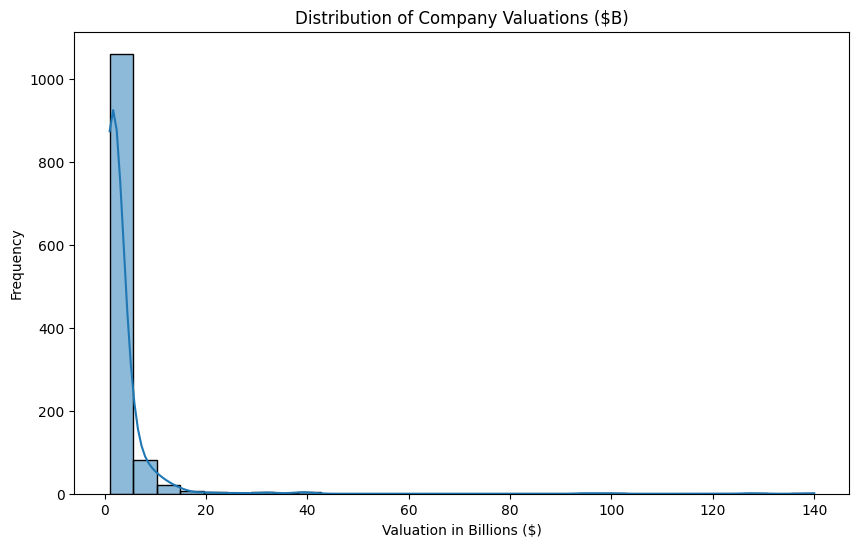

In [15]:
# Valuation distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['valuation_($b)'], kde=True, bins=30)
plt.title('Distribution of Company Valuations ($B)')
plt.xlabel('Valuation in Billions ($)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-b99bbc45b24d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data = top_companies, x = 'company', y = 'valuation_($b)', palette = 'icefire_r')
<ipython-input-16-b99bbc45b24d>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=75)


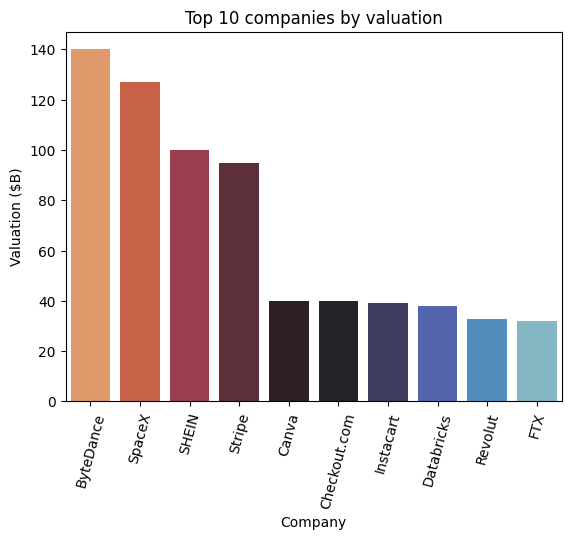

In [16]:
# Top companies by valuation
top_companies = df.sort_values(by = 'valuation_($b)', ascending=False).head(10)

fig = sns.barplot(data = top_companies, x = 'company', y = 'valuation_($b)', palette = 'icefire_r')
fig.set_xticklabels(fig.get_xticklabels(), rotation=75)
labels = fig.set(xlabel ="Company", ylabel = "Valuation ($B)", title ='Top 10 companies by valuation')


In [17]:
# Top 10 Contries
top_countries = round(df['country'].value_counts(normalize=True) * 100, 2).head(10)
top_countries

,proportion
country,
United States,53.63
China,14.67
India,5.90
United Kingdom,3.88
Germany,2.45
France,2.02
Israel,1.85
Canada,1.60
Brazil,1.43


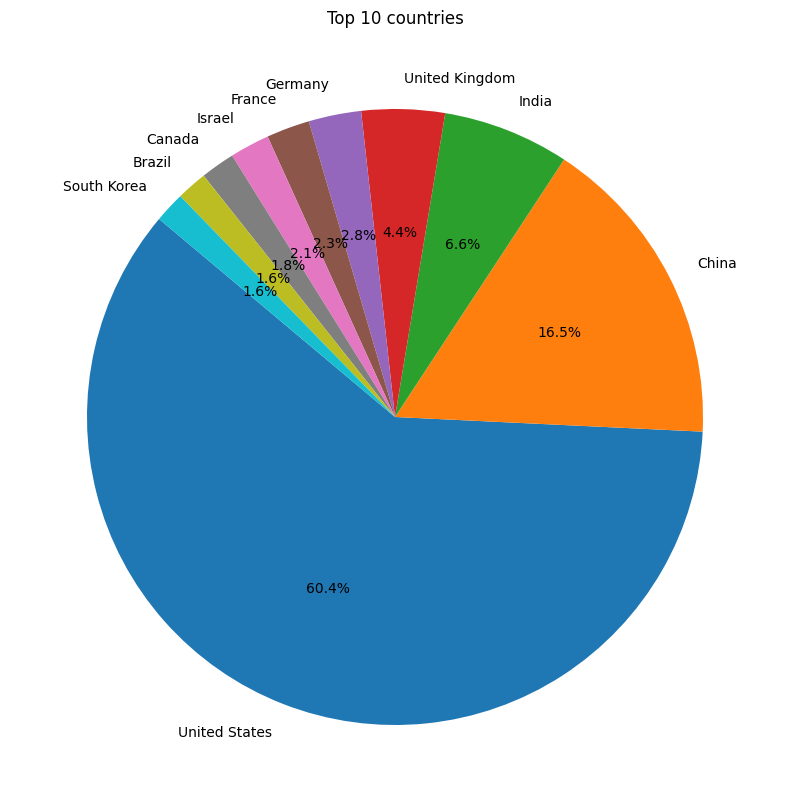

In [18]:
# Plotting Top 10 Countries Pie Chart
plt.figure(figsize=(10, 10))
plt.title('Top 10 countries')
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.show()

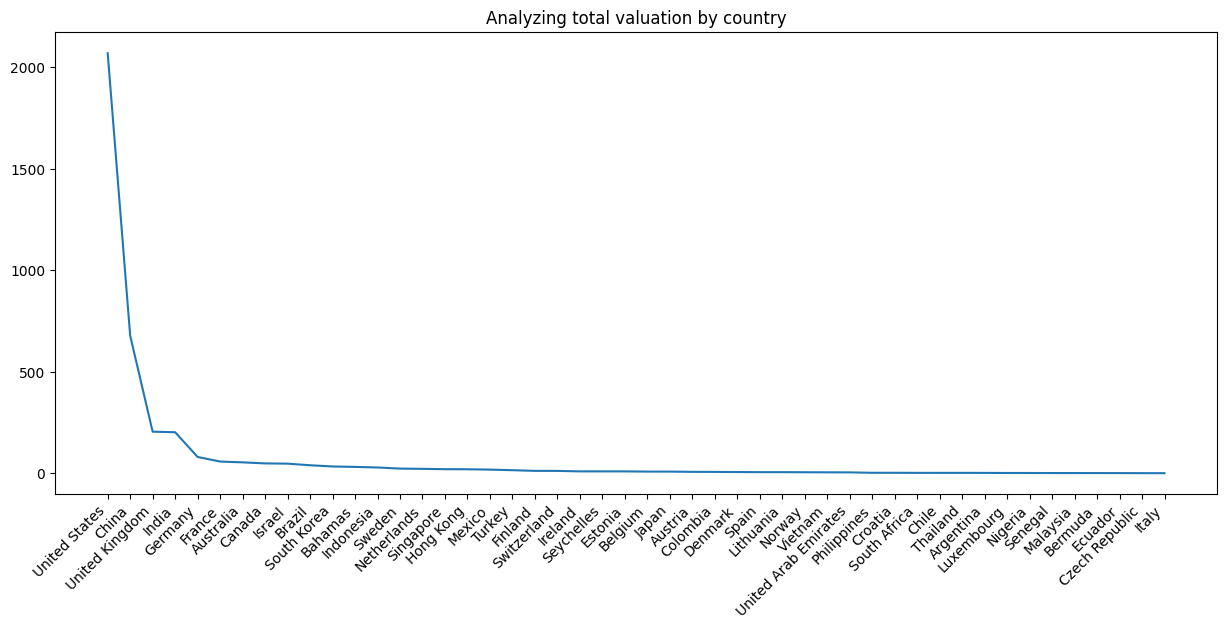

In [19]:
# Analyzing total valuation by country
valuation_by_country = df.groupby(by=['country'])['valuation_($b)'].sum().reset_index().sort_values('valuation_($b)', ascending=False)

# Plotting Valuation by Country
plt.figure(figsize=(15, 6))
plt.title('Analyzing total valuation by country')
plt.plot(valuation_by_country['country'], valuation_by_country['valuation_($b)'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
# --- Tabular Analysis ---
# Creating a detailed table
tabular_analysis = df.groupby(by=['country', 'year', 'month','industry']).count().reset_index()
tabular_analysis

,country,year,month,industry,company,valuation_($b),city,investors
0,Argentina,2021,8,Fintech,1,1,1,1
1,Australia,2018,1,Internet software & services,1,1,1,1
2,Australia,2019,3,Fintech,1,1,1,1
3,Australia,2021,5,Internet software & services,1,1,1,1
4,Australia,2021,7,Internet software & services,2,2,2,2
...,...,...,...,...,...,...,...,...
816,United States,2022,8,Fintech,1,1,1,1
817,United States,2022,8,Health,1,1,1,1
818,United States,2022,8,Internet software & services,1,1,1,1
819,Vietnam,2021,10,Internet software & services,1,1,1,1


In [21]:
# Define features (X) and target (y)
X = df.drop(columns=['valuation_($b)', 'company']) #Dropping Company Name as well
y = df['valuation_($b)']

In [22]:
# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols   = [col for col in X.columns if X[col].dtype != 'object']

In [23]:
# Data Preprocessing Pipeline
# Create a preprocessor that handles missing values, scales numerical features, and encodes categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')), #can change strategy
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  #handle_unknown='ignore'
        ]), categorical_cols)
    ])


In [24]:
# Model Selection and Training
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# --- Linear Regression Model ---
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', LinearRegression())])

In [26]:
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [27]:
# --- Random Forest Model ---
rf_model = Pipeline(steps=[('preprocessor', preprocessor),('model', RandomForestRegressor(random_state=42))])

In [28]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [29]:
# Model Evaluation
# Evaluate the models

def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}")
    print(f"{model_name} - R-squared: {r2:.2f}")
    return mse, r2

print("--- Linear Regression Evaluation ---")
evaluate_model(y_test, y_pred_lr, "Linear Regression")

print("\n--- Random Forest Evaluation ---")
evaluate_model(y_test, y_pred_rf, "Random Forest")


# 6. Model Tuning and Optimization (Random Forest)
# Tune the Random Forest model using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, n_jobs=-1, verbose=1) #cv=5
grid_search.fit(X_train, y_train)

print("\n--- Best Parameters and Score ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_rf_model = grid_search.best_estimator_
y_pred_rf_optimized = best_rf_model.predict(X_test)

print("\n--- Optimized Random Forest Evaluation ---")
evaluate_model(y_test, y_pred_rf_optimized, "Optimized Random Forest")

--- Linear Regression Evaluation ---
Linear Regression - Mean Squared Error: 28.17
Linear Regression - R-squared: -2.21

--- Random Forest Evaluation ---
Random Forest - Mean Squared Error: 15.53
Random Forest - R-squared: -0.77
Fitting 3 folds for each of 12 candidates, totalling 36 fits

--- Best Parameters and Score ---
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Score: 0.018757365706072893

--- Optimized Random Forest Evaluation ---
Optimized Random Forest - Mean Squared Error: 14.66
Optimized Random Forest - R-squared: -0.67


(14.658452741155367, -0.6681823161444704)